In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('~/Downloads/MxMH.csv')
df.describe(include='all')
df.columns
df['Primary streaming service'] = df['Primary streaming service'].replace({
    'I do not use a streaming service.': 'None',
    'Other streaming service': 'Other'
})
df['Age Group'] = pd.cut(df['Age'],
                         bins=[0, 19, 29, 39, 49, 59, 100],
                         labels=['10-19', '20-29', '30-39', '40-49', '50-59', '60+'])
df['Hours per day Group'] = pd.cut(df['Hours per day'],
                         bins=[0, 4, 9, 14, 19, 24],
                         labels=['0-4', '5-9', '10-14', '15-19', '20-24'])
df['Overall MH'] = df['Anxiety'] + df['Depression'] + df['OCD'] + df['Insomnia']
df

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions,Age Group,Hours per day Group,Overall MH
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.,10-19,0-4,4.0
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.,60+,0-4,12.0
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.,10-19,0-4,26.0
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Never,9.0,7.0,3.0,3.0,Improve,I understand.,60+,0-4,22.0
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.,10-19,0-4,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,7.0,6.0,0.0,9.0,Improve,I understand.,10-19,0-4,22.0
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.,10-19,0-4,12.0
733,11/3/2022 23:24:38,19.0,Other,6.0,Yes,No,Yes,Rap,Yes,No,...,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.,10-19,5-9,8.0
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.,10-19,5-9,8.0


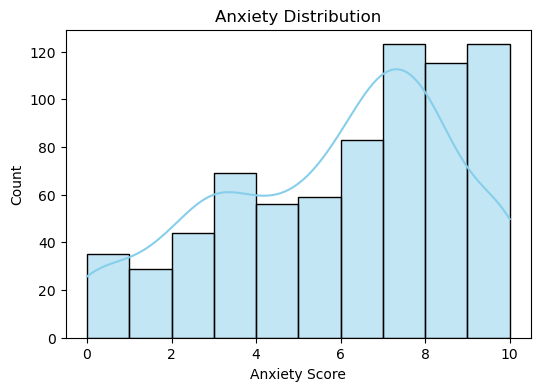

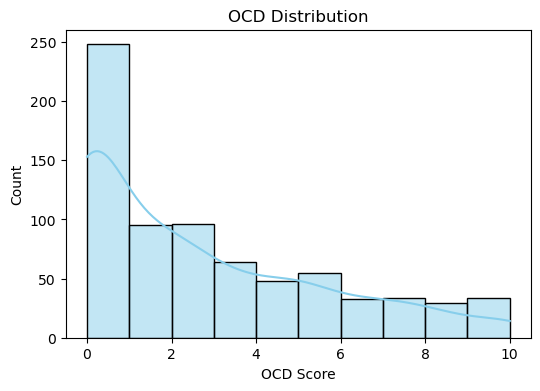

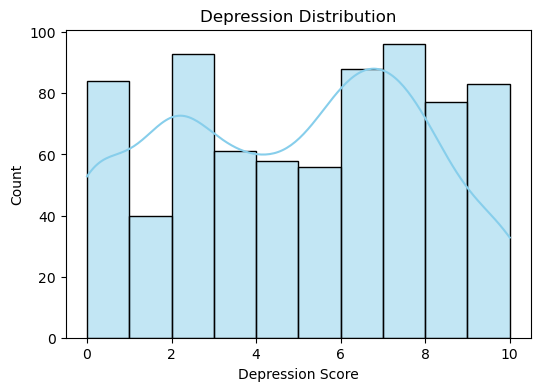

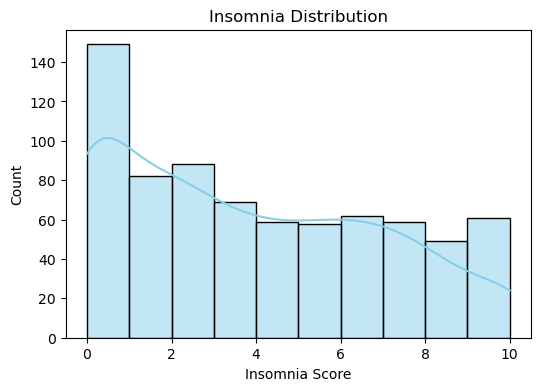

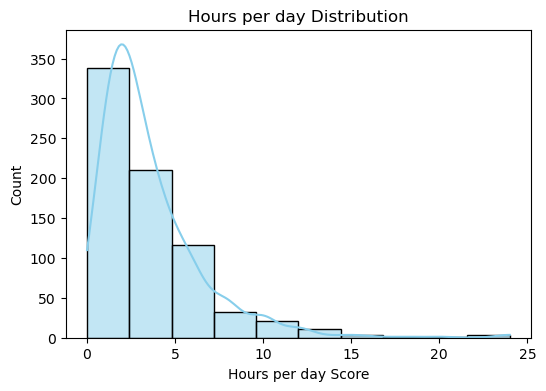

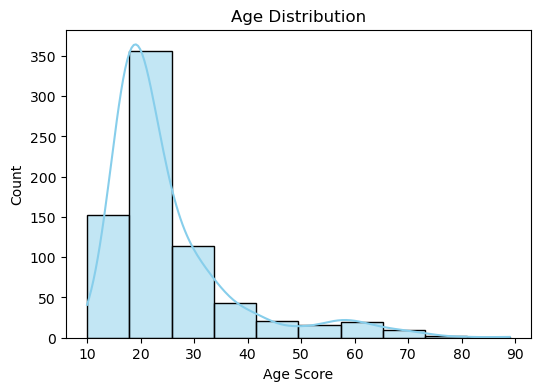

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['Anxiety', 'OCD', 'Depression', 'Insomnia', 'Hours per day', 'Age']

for col in cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, color='skyblue', bins=10)
    plt.title(f'{col} Distribution')
    plt.xlabel(f'{col} Score')
    plt.ylabel('Count')
    plt.show()

/var/folders/0l/s1l2ffnj4xzfb54jmp1tvk080000gn/T/ipykernel_46839/1273772794.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = df.groupby('Age Group')[['Insomnia', 'Depression', 'OCD', 'Anxiety']].mean()


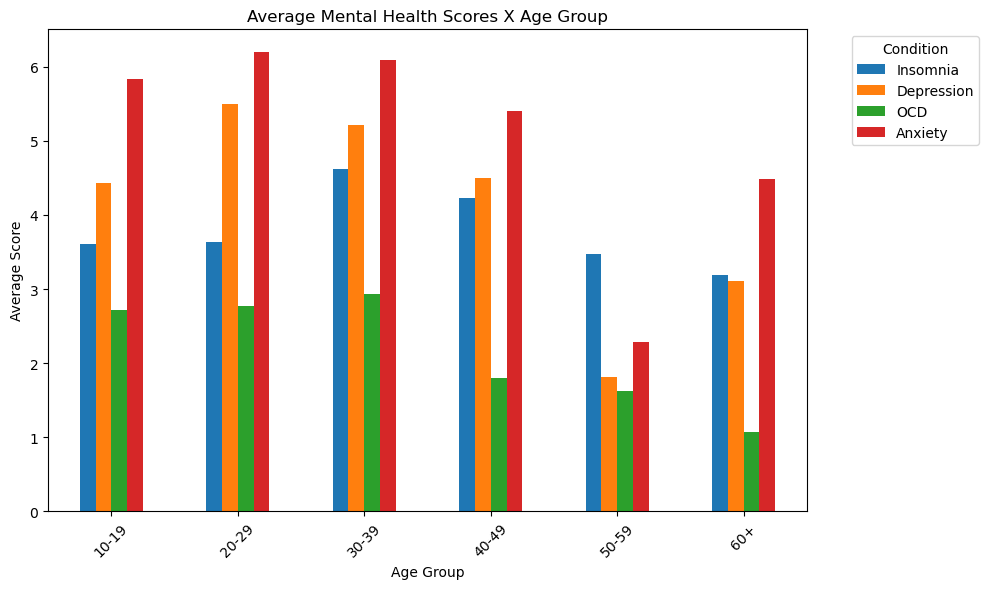

In [7]:
result = df.groupby('Age Group')[['Insomnia', 'Depression', 'OCD', 'Anxiety']].mean()
result.plot(kind='bar', figsize=(10, 6))
plt.title('Average Mental Health Scores X Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Score')
plt.legend(title='Condition')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Condition')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

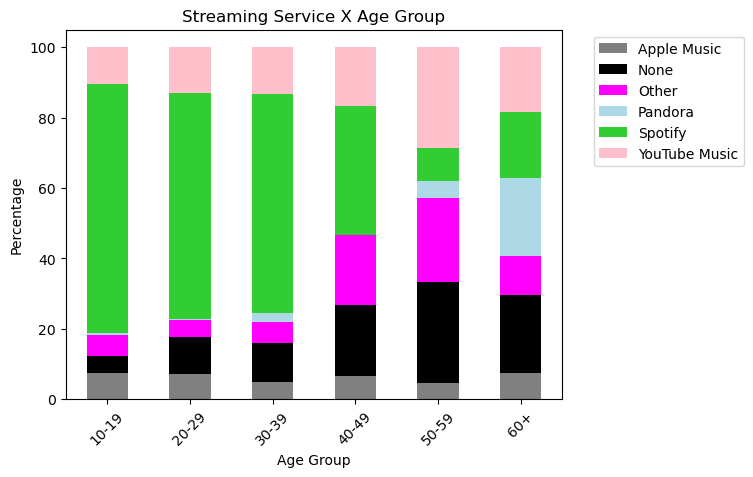

In [9]:
colors = ['gray', 'black', 'magenta', 'lightblue', 'limegreen', 'pink']
crosstab = pd.crosstab(df['Age Group'], df['Primary streaming service'], normalize='index') * 100
crosstab.plot(kind='bar', stacked=True, color=colors)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.title('Streaming Service X Age Group')
plt.ylabel('Percentage')
plt.show()

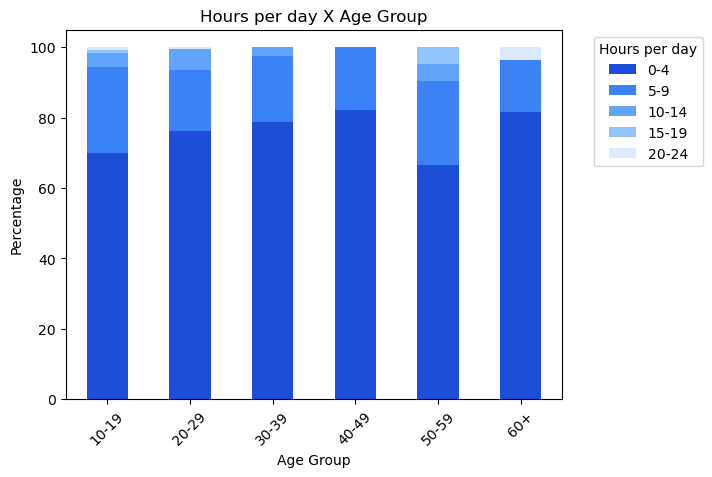

In [11]:
crosstab = pd.crosstab(df['Age Group'], df['Hours per day Group'], normalize='index') * 100
colors=['#1d4ed8', '#3b82f6', '#60a5fa', '#93c5fd', '#dbeafe']
crosstab.plot(kind='bar', stacked=True, color=colors)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Hours per day')
plt.title('Hours per day X Age Group')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.ylabel('Percentage')
plt.show()

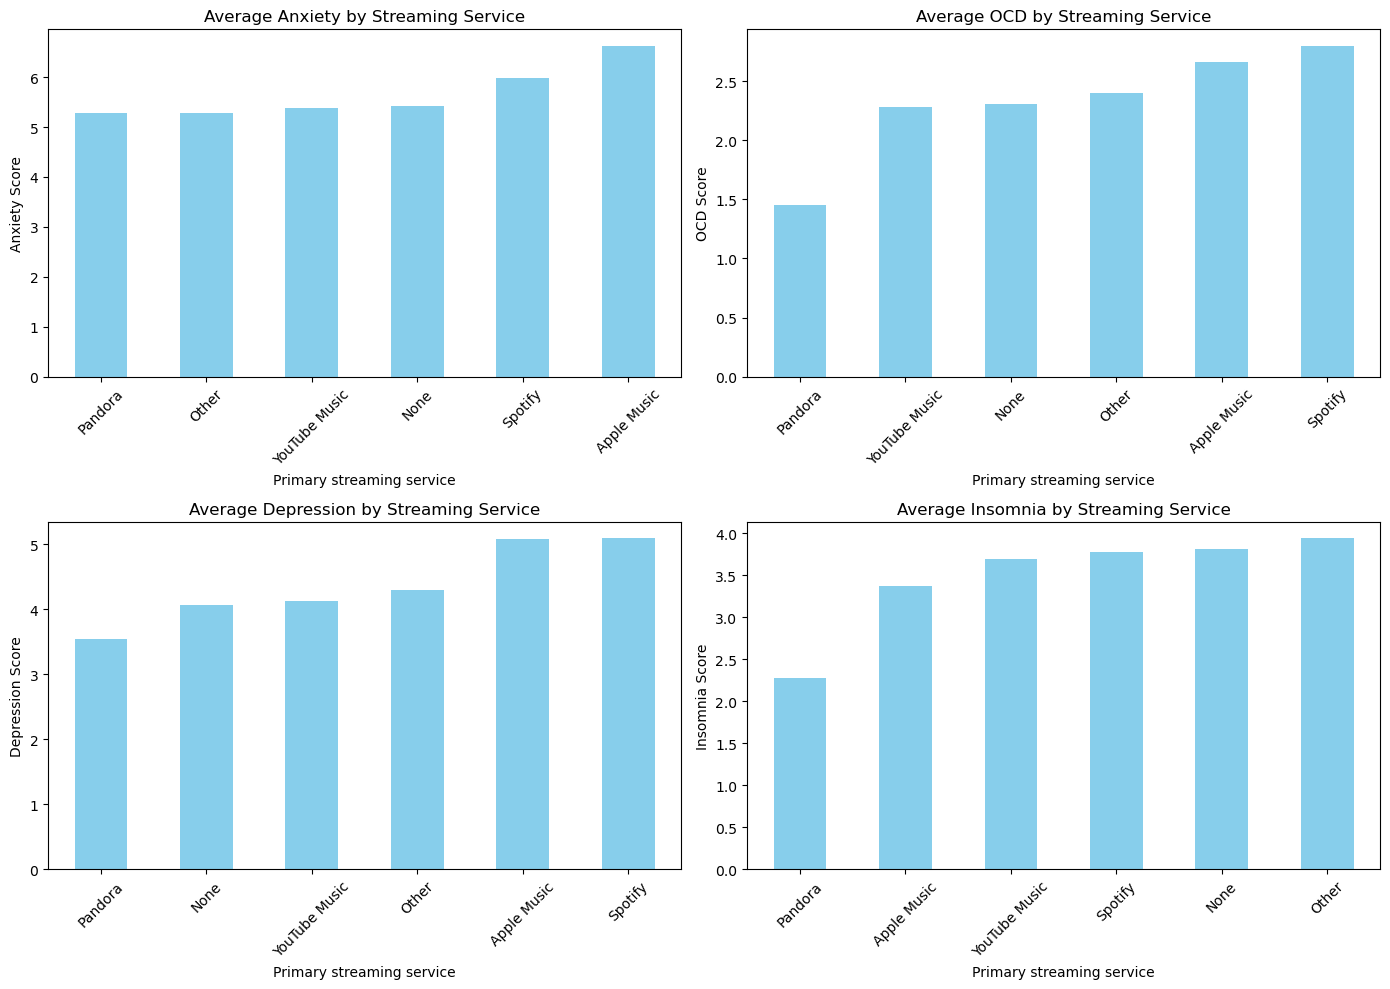

In [13]:
cols = ['Anxiety', 'OCD', 'Depression', 'Insomnia']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(cols):
    mean_scores = df.groupby('Primary streaming service')[col].mean().sort_values()
    mean_scores.plot(kind='bar', color='skyblue', ax=axes[i])
    axes[i].set_title(f'Average {col} by Streaming Service')
    axes[i].set_ylabel(f'{col} Score')
    axes[i].set_xticklabels(mean_scores.index, rotation=45)

plt.tight_layout()

plt.show()

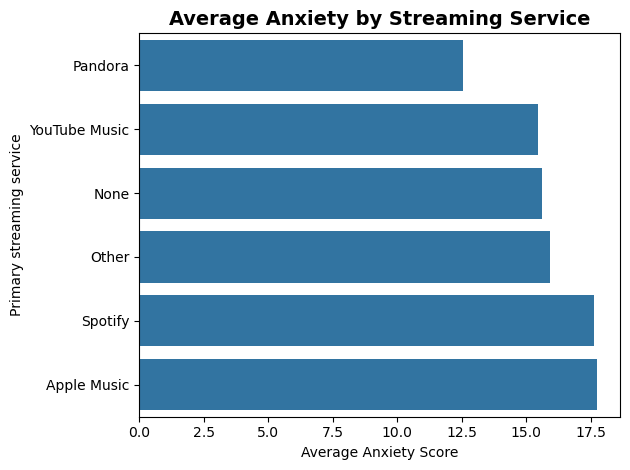

In [15]:
avg_anxiety = df.groupby('Primary streaming service')['Overall MH'].mean().sort_values()
sns.barplot(x=avg_anxiety.values, y=avg_anxiety.index)
plt.title('Average Anxiety by Streaming Service', fontsize=14, weight='bold')
plt.xlabel('Average Anxiety Score')
plt.tight_layout()
plt.show()

               Hours per day   Anxiety       OCD  Depression  Insomnia
Hours per day       1.000000  0.049319  0.118729    0.110527  0.141821
Anxiety             0.049319  1.000000  0.348350    0.519969  0.292669
OCD                 0.118729  0.348350  1.000000    0.196988  0.226354
Depression          0.110527  0.519969  0.196988    1.000000  0.378996
Insomnia            0.141821  0.292669  0.226354    0.378996  1.000000


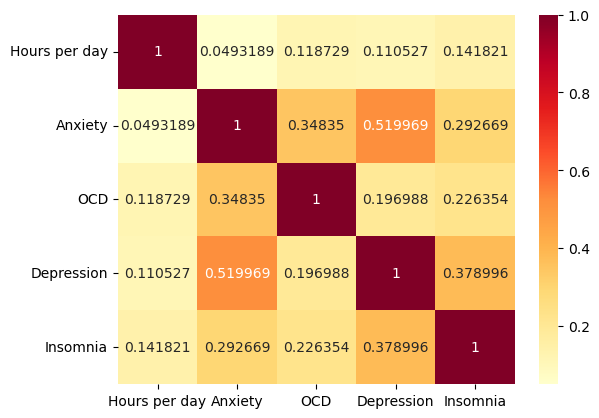

In [17]:
cols = ['Hours per day', 'Anxiety', 'OCD', 'Depression', 'Insomnia']
corr = df[cols].corr()
print(corr)
sns.heatmap(corr, annot=True, fmt='g', cmap='YlOrRd')
plt.show()

             Anxiety       OCD  Depression  Insomnia
Anxiety     1.000000  0.348350    0.519969  0.292669
OCD         0.348350  1.000000    0.196988  0.226354
Depression  0.519969  0.196988    1.000000  0.378996
Insomnia    0.292669  0.226354    0.378996  1.000000


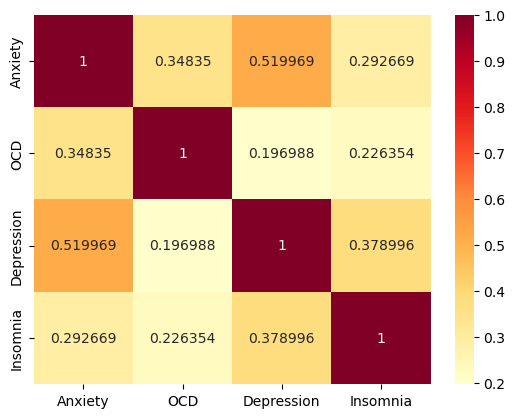

In [19]:
cols = ['Anxiety', 'OCD', 'Depression', 'Insomnia']
corr = df[cols].corr()
print(corr)
sns.heatmap(corr, annot=True, fmt='g', cmap='YlOrRd')
plt.show()